In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
import os
import cv2
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [32]:
# Define the path to the dataset and categories
path = r"C:\Users\admin\OneDrive\Desktop\potato data set CNN/PlantVillage"
cate = ['Potato___healthy', 'Potato___Late_blight']
image_size = 200

In [33]:
# Load and preprocess the dataset
input_image = []
for i in cate:
    folders = os.path.join(path, i)
    label = cate.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        if image_array is not None: 
            image_array = cv2.resize(image_array, (image_size, image_size))
            input_image.append([image_array, label])


In [34]:
# Separate features and labels
X = []
Y = []

for X_values, labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [35]:
X = np.array(X)
Y = np.array(Y)

In [36]:
# Convert the images to float32 and normalize
X = X.astype('float32') / 255.0

In [37]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [38]:
# Define the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])


In [39]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
# Train the model
model.fit(x_train, y_train, validation_split=0.2, batch_size=128, epochs=10)

Epoch 1/10


C:\Users\admin\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


6/6 [==============================] - 8s 1s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1186 - val_accuracy: 0.9568
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1250 - val_accuracy: 0.9568
Epoch 3/10
6/6 [==============================] - 8s 1s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 0.9676
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1173 - val_accuracy: 0.9676
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1182 - val_accuracy: 0.9676
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1151 - val_accuracy: 0.9676
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1136 - val_accuracy: 0.9730
Epoch 8/10
6/6 [==============================] - 8s

In [57]:
# Predictions
pred = model.predict(x_test)
pred_classes = pred.argmax(axis=1)

1/8 [==>...........................] - ETA: 0s

C:\Users\admin\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 [==============================] - 1s 98ms/step


In [58]:
accuracy_score(y_test, pred_classes)


0.9696969696969697

In [59]:
confusion_matrix(y_test, pred_classes)


array([[ 24,   7],
       [  0, 200]], dtype=int64)

In [60]:
print("Classification Report:\n", classification_report(y_test, pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        31
           1       0.97      1.00      0.98       200

    accuracy                           0.97       231
   macro avg       0.98      0.89      0.93       231
weighted avg       0.97      0.97      0.97       231



In [61]:
# Define the predict function
class_names = ['Potato___healthy', 'Potato___Late_blight']

In [62]:
def predict(model, image):
    image = np.expand_dims(image, axis=0)  # Expand dimensions to match the model input shape
    predictions = model.predict(image)
    confidence = np.max(predictions) * 100  # Get the confidence in percentage
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class, confidence

In [70]:
# Create a TensorFlow dataset for the test set
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(buffer_size=len(x_test)).batch(32)

1/1 [==============================] - 0s 48ms/step


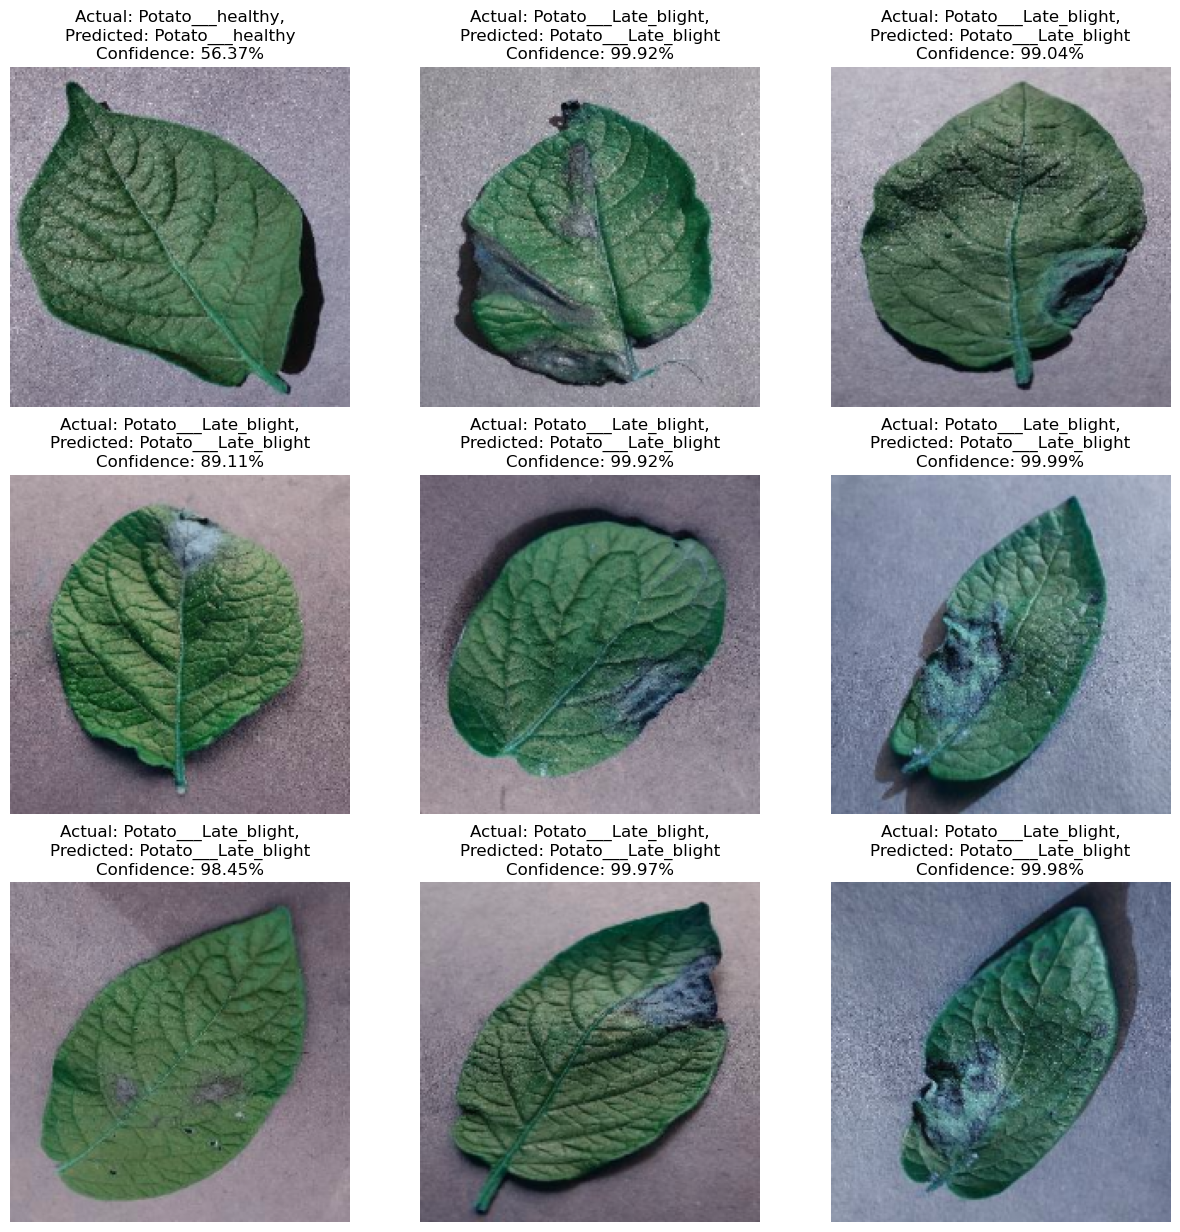

In [72]:
# Visualize the predictions
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):  # Take a single batch from the test dataset
    for i in range(9):  # Display the first 9 images in the batch
        ax = plt.subplot(3, 3, i + 1)
        image_display = (images[i].numpy() * 255).astype("uint8")  # Scale back to [0, 255] for display
        plt.imshow(image_display)  # Display the image

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 

        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        plt.axis("off") 

plt.show()